In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import statistics


In [2]:
city_df = pd.read_csv("Resources/city_data.csv")

ride_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
city_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [4]:
ride_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [5]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [7]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
#get the number of unique types of cities in the "type" column
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#number of urban cities
sum(city_df["type"]=="Urban")

66

In [11]:
#number of suburban cities
sum(city_df["type"]=="Suburban")

36

In [12]:
#number of suburban cities
sum(city_df["type"]=="Rural")

18

In [13]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:

# average fare for each city type
#cheese_df = pyber_df.groupby("type").mean()

# total number of rides for each city types
totalrides_df = pyber_df.groupby("type").mean() # this df shows the average fair per city type
totalrides_df
#totalrides_df[["ride_id"]]    this df will show the total number of rides per city
#chairs = totalrides_df.loc[:,"ride_id"].count()


,fare,ride_id,driver_count
type,,,
Rural,34.623440,4.647746e+12,4.296000
Suburban,30.970128,4.971015e+12,13.712000
Urban,24.525772,4.873485e+12,36.678154


In [15]:
#make the urban cities dataframe based on the pyber_df merged dataframe
urban_cities_df = pyber_df[pyber_df["type"]=="Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#make the suburban cities dataframe based on the pyber_df merged dataframe
suburban_cities_df = pyber_df[pyber_df["type"]=="Suburban"]

suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
#make the rural cities dataframe based on the pyber_df merged dataframe
rural_cities_df = pyber_df[pyber_df["type"]=="Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
#make a data series from each city type dataframe [urban, suburban, rural]


In [19]:
#Here's the data series you wanna make for the urban_cities_df to eventually get number of rides 
#labeled with each city type

#urban_ds = urban_cities_df.groupby("city").count()

#Then, when you tack on the ["ride_id"] series, you will get the count of the rides

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#notice above how putting double brackets around the quote ride_id gives you a dataframe looking result
#rather than just the text based list result

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [20]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [21]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [22]:
#5.3.3
#Get the average city fare for each city type

urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_average_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [23]:
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

suburban_average_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [24]:
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

rural_average_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [25]:
#5.3.4
#Get the average number of drivers for each city underneath the city type umbrella of urban

urban_average_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_average_drivers

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [26]:
#suburban average number drivers for each city that is underneath the city type umbrella of suburban

suburban_average_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_average_drivers

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [27]:
#rural average number drivers for each city that is underneath the city type umbrella of rural

rural_average_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_average_drivers

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [28]:
#5.3.5
# Create a bubble chart for each type of city

#1. the x-axis is the number of rides per each city (only suburban cities for scatter plot 1)
#2. the y-axis is the average fare for each city (only suburban cities for scatter plot 1)
#3. the size of each marker is the average number of drivers per each city (only suburban cities for plt 1)

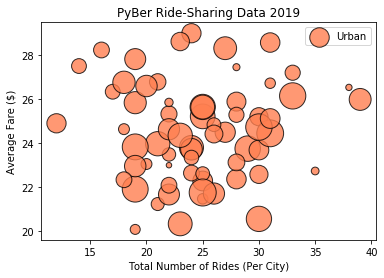

In [29]:
#urban cities bubble plot

xurb = urban_ride_count
yurb = urban_average_fare
buburb = urban_average_drivers

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")

plt.scatter(xurb,yurb,s=10*buburb, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.legend()

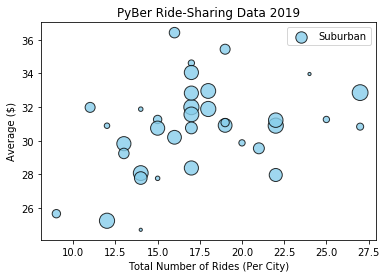

In [30]:
#suburban cities bubble plot

xsuburb = suburban_ride_count
ysuburb = suburban_average_fare
bubsuburb = suburban_average_drivers

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average ($)")
plt.title("PyBer Ride-Sharing Data 2019")


plt.scatter(xsuburb,ysuburb,s=10*bubsuburb, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.legend()

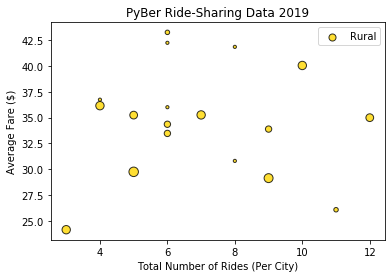

In [31]:
#rural cities bubble plot

xrural = rural_ride_count
yrural = rural_average_fare
bubrural = rural_average_drivers

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")

plt.scatter(xrural,yrural,s=10*bubrural, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.legend()

In [32]:
#5.3.6 Bubble chart for all three city type at once

#To make a bubble chart for all three city types at once, you must put the code for them in the same cell
#then, add plt.show() at the bottom of the cell:

<function matplotlib.pyplot.show(*args, **kw)>

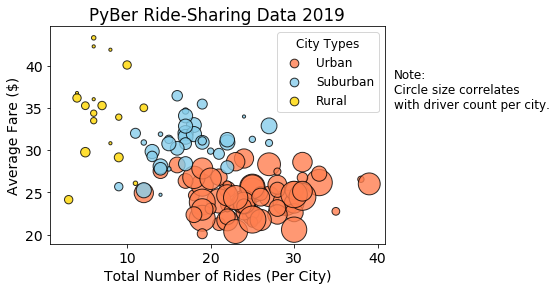

In [86]:
#urban bubble chart
xurb = urban_ride_count
yurb = urban_average_fare
buburb = urban_average_drivers

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")

plt.scatter(xurb,yurb,s=10*buburb, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.legend()

#suburban bubble chart
xsuburb = suburban_ride_count
ysuburb = suburban_average_fare
bubsuburb = suburban_average_drivers

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average ($)")
plt.title("PyBer Ride-Sharing Data 2019")


plt.scatter(xsuburb,ysuburb,s=10*bubsuburb, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.legend()

#rural bubble chart
xrural = rural_ride_count
yrural = rural_average_fare
bubrural = rural_average_drivers

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data 2019")

plt.scatter(xrural,yrural,s=10*bubrural, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")



#we need to correct the size of the bubbles in the legend, so lets do this:
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35,"Note:\nCircle size correlates\nwith driver count per city.",fontsize = 12 )

plt.savefig("analysis/Fig1.png",dpi=100, bbox_inches= "tight")

#plt.savefig("analysis/Fig1.png")

plt.show

In [34]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [35]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
urban_ride_count.median()

24.0

In [40]:
suburban_ride_count.mode()

0    17
dtype: int64

In [41]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is: {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is: 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [42]:
#how many times does 17 appear in the suburban cities

mode_surban_ride_count = sts.mode(suburban_ride_count)

mode_surban_ride_count

ModeResult(mode=array([17]), count=array([7]))

In [43]:
#Calculate the measure of central tendency
#mean, median, and mode


In [44]:
#rural cities mode

mode_rural_ride_count = sts.mode(rural_ride_count)

mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

In [45]:
#5.4.2

#list of urban cities fares

urban_fares = urban_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
#list of suburban cities fares

suburban_fares = suburban_cities_df["fare"]

suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [47]:
rural_fares = rural_cities_df["fare"]

rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [48]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [49]:
# Calculate the measures of central tendency for the average fare for the sburban cities.

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [50]:
# Calculate the measures of central tendency for the average fare for the rural cities.

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [51]:
#5.4.3

#Create summary statitstics for the number of drivers for each city type

# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()



0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [52]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

suburban_drivers.mean()


13.712

In [53]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()





2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [54]:
#5.4.4
#Create box and whisker plots for Ride Count, Ride Fare, and Driver Count

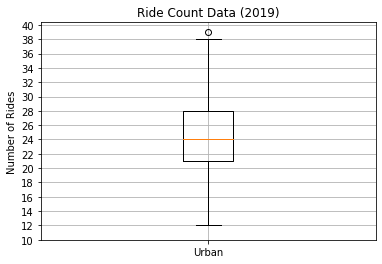

In [55]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()



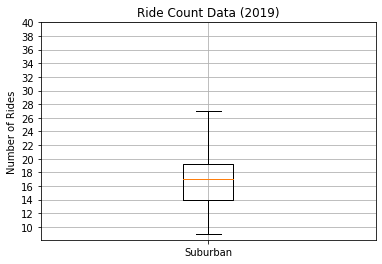

In [56]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

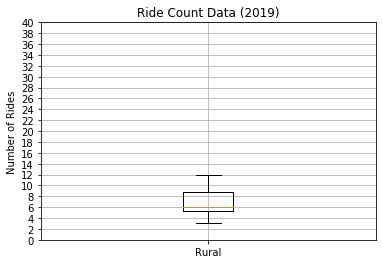

In [57]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()
plt.show()

In [58]:
# To show all the box and whisker plots in one plot, we need to modify the boxplot() functio

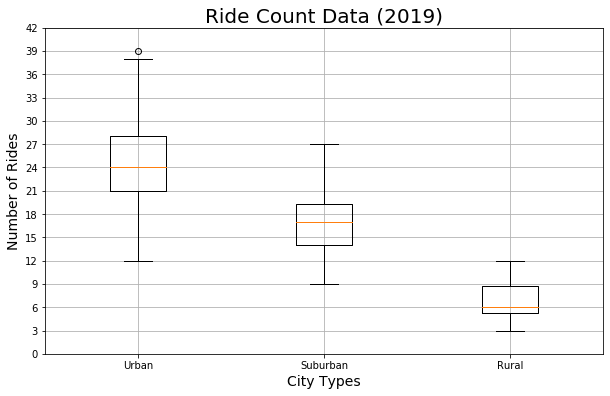

In [59]:
# Add all ride count box-and-whisker plots to the same graph.
# we make the x axis labels fresh using strings wrapped in brackets, you can use a list of strings for xaxis lb
x_labels = ["Urban", "Suburban","Rural"]
#ride_count_data is the list of all relavant ride count values for each city type to be used in these bxw plots
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [60]:
# how to get the value of the outlier, the name for the city: aka the city that has the highest ride number

#below is a variation of a function that I haven't seen before.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

urban_city_outlier

print(f'{urban_city_outlier} has the highest ride count.')

West Angela has the highest ride count.


In [61]:
#box and whisker plots for ride fare data

#get the average ride fare data per city tye
#for urban
urban_fares = urban_cities_df["fare"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [62]:
#get the average ride fare data per city type

suburban_fares = suburban_cities_df["fare"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [63]:
#get the average ride fare data per city tye
#for suburban

suburban_fares = suburban_cities_df["fare"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [64]:
#get the average ride fare data per city tye
#for rural

rural_fares = rural_cities_df["fare"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

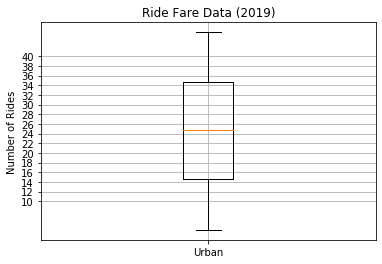

In [65]:
# Create a box-and-whisker plot for the urban cities fare.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

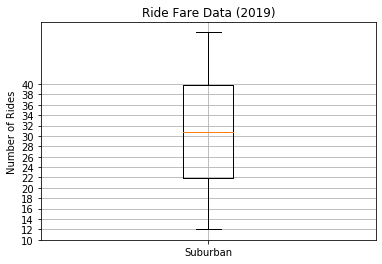

In [66]:
# Create a box-and-whisker plot for the suburban cities fare.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

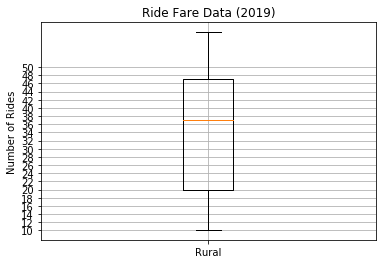

In [67]:
# Create a box-and-whisker plot for the rural cities fare.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 51, step=2.0))
ax.grid()
plt.show()

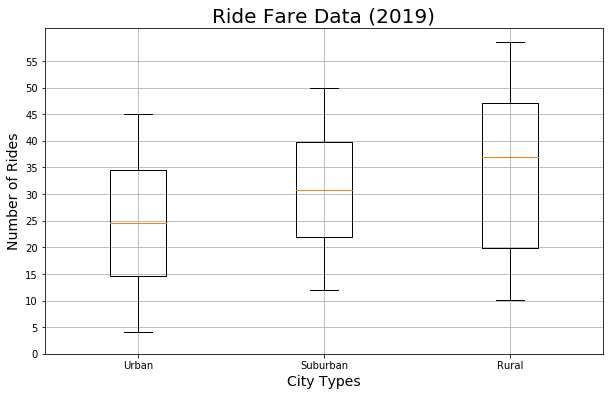

In [68]:
# Add all ride count box-and-whisker plots to the same graph.

x_labelz = ["Urban", "Suburban", "Rural"]
ride_countz_data = [urban_fares,suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10,6))

ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_countz_data, labels=x_labelz)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [69]:
#Box and Whisker plots for the DriverCount Data

In [70]:
#urban driver count

urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [71]:
#suburban driver count

urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [72]:
#rural driver count

rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

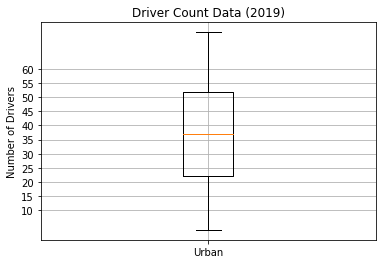

In [73]:
#make a box and whisker plot for the urban driver count

fig,ax = plt.subplots()
x_lebels = ["Urban"]

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.boxplot(urban_drivers, labels = x_lebels)
ax.set_yticks(np.arange(10, 61, step=5.0))
ax.grid()

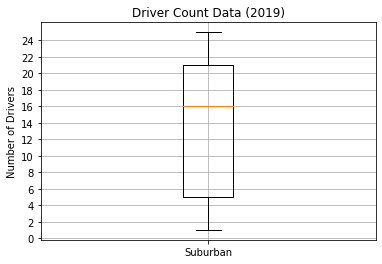

In [74]:
#make a box and whisker plot for the rural driver count

fig,ax = plt.subplots()
x_lebels = ["Suburban"]

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.boxplot(suburban_drivers, labels = x_lebels)
ax.set_yticks(np.arange(0, 26, step=2.0))
ax.grid()

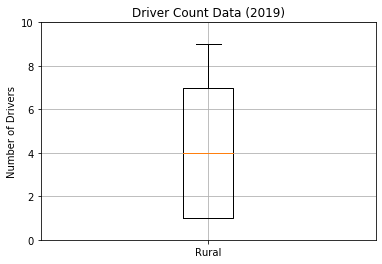

In [75]:
#make a box and whisker plot for the rural driver count

fig,ax = plt.subplots()
x_lebels = ["Rural"]

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.boxplot(rural_drivers, labels = x_lebels)
ax.set_yticks(np.arange(0, 11, step=2.0))
ax.grid()

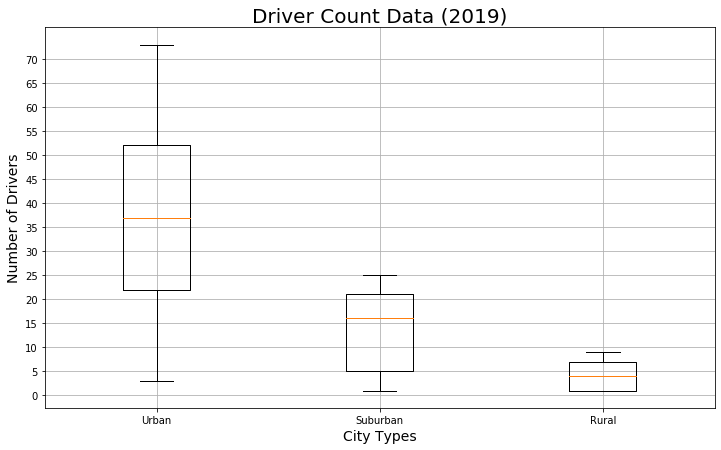

In [76]:
# make a box and whisker plot with all 3 city types for driver count data

fig,ax = plt.subplots(figsize = (12,7))
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

x_lebels = ["Urban","Suburban","Rural"]



ax.set_title("Driver Count Data (2019)",fontsize = 20)
ax.set_ylabel("Number of Drivers",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels = x_lebels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")

In [77]:
#5.5.1
#lets calculate the percentage of fares per city type per city. First you need sum of fares per city type
#First, get the sum of fares for each city type (total for each city type)

sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [78]:
#Get the total fares for each city type
#this is the total fares in all cities
total_fares = pyber_df["fare"].sum()

total_fares



63538.64

In [79]:
type_percents = 100*(sum_fares_by_type/total_fares)

#this yield the percentage that is all fares from each city divided by the total fares
type_percents

#as you can see, urban cities contribute to the most fares, likely due to their higher population

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

(-1.1159323653788986,
 1.198450635128262,
 -1.1140802211710512,
 1.1725488385019902)

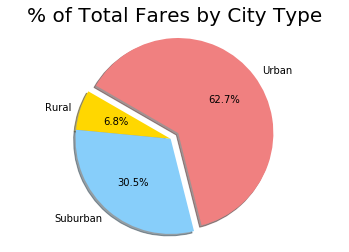

In [80]:
import matplotlib as mpl

plt.pie(type_percents,labels = ["Rural", "Suburban", "Urban"], autopct = "%1.1f%%",explode = [0,0,0.1]
        ,shadow = True, startangle = 150, colors = ["gold","lightskyblue", "lightcoral"])

plt.title("% of Total Fares by City Type", fontsize = 20)

mpl.rcParams["font.size"]=14

plt.savefig("analysis/Fig5.png")

plt.axis("equal")
#reminder, the pie chart below represents the fares from each city type out of the total fares

In [81]:
#5.6.1 Calculate Ride Percentages
#make another pie chart for the % of rides from each city type out of the total number of rides

# this line groups df by type, which means we are going to get an end product statistic for "something"
# then it takes the count of values in each column (this is the statistic we want), and finally only returns
# the count of ride_id which is a surrogate for the ride count
ridecount_by_type = pyber_df.groupby(["type"]).count()["ride_id"]

ridecount_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [82]:
# this line returns the total ride count
total_rides = pyber_df["ride_id"].count()

total_rides

2375

In [83]:
percent_rides = 100*(ridecount_by_type/total_rides)

percent_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

(-1.1133217498639854,
 1.2046187922122145,
 -1.096114159756932,
 1.1519223048259297)

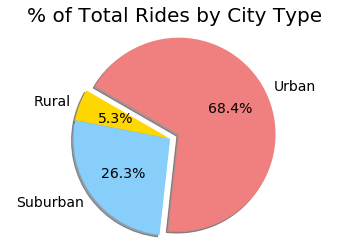

In [84]:
#in this plot we are going to make the pie chart for percent rides by each city type

import matplotlib as mpl

plt.pie(percent_rides,labels = ["Rural", "Suburban", "Urban"], autopct = "%1.1f%%",explode = [0,0,0.1]
        ,shadow = True, startangle = 150, colors = ["gold","lightskyblue", "lightcoral"])

plt.title("% of Total Rides by City Type", fontsize = 20)

mpl.rcParams["font.size"]=14

plt.savefig("analysis/Fig6.png")

plt.axis("equal")